# import libaries 

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import urllib.request
import shutil
import os 
import sys
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB  
from sklearn_pandas import DataFrameMapper
import pandas as pd
import numpy as np
np.random.seed(0)
import text_classification as t 
import matplotlib.pyplot as plt
from matplotlib import cm
nltk.download('stopwords')
#tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

import pickle


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading the data

In [2]:
df = pd.read_csv('insta_cleaned.csv')

In [3]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   insta_name       5943 non-null   object
 1   source_image     5920 non-null   object
 2   Caption          5943 non-null   object
 3   Caption_length   5943 non-null   int64 
 4   followers        5943 non-null   int64 
 5   num_of_likes     5943 non-null   int64 
 6   media_type       5943 non-null   object
 7   video_views      5943 non-null   int64 
 8   num_of_hashtags  5943 non-null   int64 
 9   num_of_mentions  5943 non-null   int64 
 10  date             5943 non-null   object
 11  time             5943 non-null   int64 
 12  day              5943 non-null   object
dtypes: int64(7), object(6)
memory usage: 603.7+ KB


In [5]:
df_cap = df ['Caption']

In [6]:
df_cap[0]

'1 year ago today was the last day of full freedom before lockdown started to kick in. Can you imagine this many people out today!?! 👀.......Shot from @londonbeautifullife instagram. .....#London #LDN #Skyline #ThisIsLondon #LondonEye #BigBen #Southbank #Westminster #NottingHill #LeicesterSquare #Mayfair #Soho #CentralLondon #Shoreditch #PiccadillyCircus #BuckinghamPalace #RiverThames #TheShard #City #Hackney #Photography #LondonBeautifulLife #CanaryWharf #MetroLDN #TowerBridge #Camden #CoventGarden #TrafalgarSquare #StPaulsCathedral #Chinatown'

In [7]:
len(df_cap)

5943

## clean the data 

## Delete any missing data 

In [8]:
df.isnull().sum()

insta_name          0
source_image       23
Caption             0
Caption_length      0
followers           0
num_of_likes        0
media_type          0
video_views         0
num_of_hashtags     0
num_of_mentions     0
date                0
time                0
day                 0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

insta_name         0
source_image       0
Caption            0
Caption_length     0
followers          0
num_of_likes       0
media_type         0
video_views        0
num_of_hashtags    0
num_of_mentions    0
date               0
time               0
day                0
dtype: int64

I want my data to be as accurate as possible, therefore any image that has certain words in the picture caption will fail the test immediately, the following words will be used: "link in bio", "buy now", "limited time", "giveaway" 

In [11]:
words = ['giveaway','bio', 'buy now',' limited time']

In [12]:
df_cleaned = t.clean_pics(df,words)

In [13]:
df_cleaned

,insta_name,source_image,Caption,Caption_length,followers,num_of_likes,media_type,video_views,num_of_hashtags,num_of_mentions,date,time,day
0,londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,1 year ago today was the last day of full free...,549,628000,1078,image,0,31,1,2021-03-15,14,Monday
1,londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,Happy Mother's Day to all the amazing mothers ...,639,628000,870,image,0,31,2,2021-03-14,18,Sunday
2,londonbeautifullife,https://scontent-lhr8-1.cdninstagram.com/v/t51...,📸 - @photosbyjet - who else misses Harrods? Br...,505,628000,3032,image,0,31,3,2021-03-13,18,Saturday
3,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,📸 - @girlwiththeredbob - this photo by @girlwi...,570,628000,994,image,0,31,3,2021-03-12,15,Friday
4,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,When the sun takes centre stage ☀️.....Shot fr...,448,628000,574,image,0,31,1,2021-03-10,14,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,exploringlondon,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Happy weekend everyone! Have you guys come acr...,536,828000,911,image,0,0,5,2018-06-23,11,Saturday
5869,exploringlondon,https://scontent-lhr8-2.cdninstagram.com/v/t51...,What a view from the new @jinbolaw_skybar 😍 Ro...,284,828000,1093,image,0,0,2,2018-06-22,18,Friday
5870,exploringlondon,https://scontent-lhr8-1.cdninstagram.com/v/t51...,"Summer evenings in the garden, planning our we...",615,828000,916,image,0,28,1,2018-06-21,16,Thursday
5871,exploringlondon,https://scontent-lht6-1.cdninstagram.com/v/t51...,We love the beautiful funfairs that pop up aro...,609,828000,555,image,0,29,8,2018-06-21,8,Thursday


Any picture that has more than 1 mention will also be deleted as this could lead to confusion when crediting the picture. The idea behind is that one mention normally means that the picture is being credited to one person, However, if there are more than one then it usually means that there is some kind of giveaway or promotion to a private business.

In [14]:
df_cleaned = t.del_mentions(df_cleaned)

In [15]:
df_cleaned['Caption'][0]

'1 year ago today was the last day of full freedom before lockdown started to kick in. Can you imagine this many people out today!?! 👀.......Shot from @londonbeautifullife instagram. .....#London #LDN #Skyline #ThisIsLondon #LondonEye #BigBen #Southbank #Westminster #NottingHill #LeicesterSquare #Mayfair #Soho #CentralLondon #Shoreditch #PiccadillyCircus #BuckinghamPalace #RiverThames #TheShard #City #Hackney #Photography #LondonBeautifulLife #CanaryWharf #MetroLDN #TowerBridge #Camden #CoventGarden #TrafalgarSquare #StPaulsCathedral #Chinatown'

In [16]:
len(df_cleaned)

4331

In [17]:
df_cleaned.head()

,insta_name,source_image,Caption,Caption_length,followers,num_of_likes,media_type,video_views,num_of_hashtags,num_of_mentions,date,time,day
0,londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,1 year ago today was the last day of full free...,549,628000,1078,image,0,31,1,2021-03-15,14,Monday
4,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,When the sun takes centre stage ☀️.....Shot fr...,448,628000,574,image,0,31,1,2021-03-10,14,Wednesday
8,londonbeautifullife,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Who else misses the West End Theatre shows!?! ...,463,628000,6050,image,0,31,1,2021-03-06,15,Saturday
9,londonbeautifullife,https://scontent-lhr8-1.cdninstagram.com/v/t51...,How many policemen can you spot!?! 👮‍♂️......S...,449,628000,1268,image,0,31,1,2021-03-05,9,Friday
12,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,End of the week vibes 🤩😍🤩.....Shot from @londo...,439,628000,700,image,0,31,1,2021-02-28,15,Sunday


This has dropped my data from 5943 to 4375.

# Cleaning and Preprocessing the data

Before starting to do my modelling the machine learning needs to be able to read the caption.This needs to be vectorized, as computers do not understand words, nevertheless, they do numbers. Vectorizing is the process of transforming words into numerical fields that can be analyzed mathematically.

## Getting the stopwords

The first step is to getting the stopwords and punctuation, put this into a list that will be used to eliminate those words from the text 

In [18]:
stopwords_list = t.get_stopwords()

In [19]:
tokenized_captions = t.tokenize_all_captions(df_cleaned)

In [20]:
filtered_tokenized_captions = t.filter_list(tokenized_captions, stopwords_list)

In [21]:
lemmatize_captions = t.lemmatize_caption(tokenized_captions)

## Exploratory Analysis

In [22]:
freq_caption = FreqDist(filtered_tokenized_captions)

In [23]:
bar_counts = [x[1] for x in freq_caption.most_common(30)]
bar_words = [x[0] for x in freq_caption.most_common(30)]

In [24]:
# set the color of our bar graphs
color = cm.magma_r(np.linspace(.4,.8, 30))

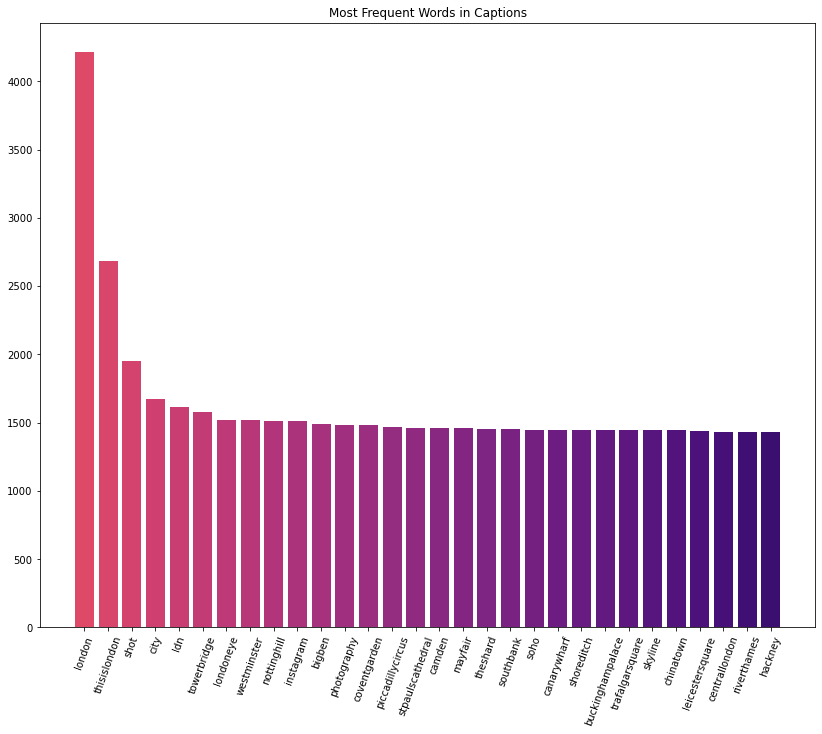

In [25]:
new_figure = plt.figure(figsize=(22,10))

ax = new_figure.add_subplot(121)

ax.bar(bar_words, bar_counts, color = color)
ax.title.set_text("Most Frequent Words in Captions")
for ax in new_figure.axes: 
    plt.sca(ax)
    plt.xticks(rotation = 70)
plt.tight_layout(pad=0)
plt.show()

## Word Clouds

In [26]:
#!pip install wordcloud
from wordcloud import WordCloud

In [27]:
caption_dictionary = dict(zip(bar_words,bar_counts))

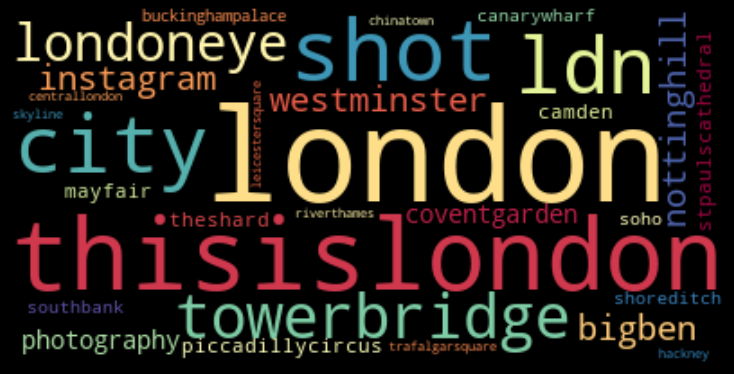

In [28]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(caption_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

## Machine Learning Image Classification

I will be moving to classify the pictures in this dataset. I have done a Machine learning model in another set of data with similar pictures. However, the pictures on the other dataset are from New york. 
The chosen model was Logistic Regression which return a 0.8 F1 Test score, 0.98 test recall and 0.67 Accuracy

In [29]:
image_class_model = pickle.load(open('image_classificaiton_model.sav', 'rb'))

### Dealing with data

In [30]:
df_cleaned 

,insta_name,source_image,Caption,Caption_length,followers,num_of_likes,media_type,video_views,num_of_hashtags,num_of_mentions,date,time,day
0,londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,1 year ago today was the last day of full free...,549,628000,1078,image,0,31,1,2021-03-15,14,Monday
4,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,When the sun takes centre stage ☀️.....Shot fr...,448,628000,574,image,0,31,1,2021-03-10,14,Wednesday
8,londonbeautifullife,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Who else misses the West End Theatre shows!?! ...,463,628000,6050,image,0,31,1,2021-03-06,15,Saturday
9,londonbeautifullife,https://scontent-lhr8-1.cdninstagram.com/v/t51...,How many policemen can you spot!?! 👮‍♂️......S...,449,628000,1268,image,0,31,1,2021-03-05,9,Friday
12,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,End of the week vibes 🤩😍🤩.....Shot from @londo...,439,628000,700,image,0,31,1,2021-02-28,15,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,exploringlondon,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Good morning London! New working week and we'r...,128,828000,1144,image,0,0,1,2018-06-25,7,Monday
5865,exploringlondon,https://scontent-lhr8-1.cdninstagram.com/v/t51...,ENGLAND 6 - 1 PANAMA! The biggest win for Engl...,272,828000,920,image,0,0,0,2018-06-24,14,Sunday
5867,exploringlondon,https://scontent-lhr8-1.cdninstagram.com/v/t51...,A new sky scraper has gone up in central Londo...,359,828000,1198,image,0,0,1,2018-06-23,18,Saturday
5870,exploringlondon,https://scontent-lhr8-1.cdninstagram.com/v/t51...,"Summer evenings in the garden, planning our we...",615,828000,916,image,0,28,1,2018-06-21,16,Thursday


Setting x and y 

In [31]:
df_cleaned.drop(['date','time','media_type','video_views','insta_name','day'], axis = 1, inplace = True)

In [32]:
y_final = pd.DataFrame(columns = ['target'])

In [33]:
df_cleaned.reset_index(drop = True)

,source_image,Caption,Caption_length,followers,num_of_likes,num_of_hashtags,num_of_mentions
0,https://scontent-lht6-1.cdninstagram.com/v/t51...,1 year ago today was the last day of full free...,549,628000,1078,31,1
1,https://scontent-lhr8-2.cdninstagram.com/v/t51...,When the sun takes centre stage ☀️.....Shot fr...,448,628000,574,31,1
2,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Who else misses the West End Theatre shows!?! ...,463,628000,6050,31,1
3,https://scontent-lhr8-1.cdninstagram.com/v/t51...,How many policemen can you spot!?! 👮‍♂️......S...,449,628000,1268,31,1
4,https://scontent-lhr8-2.cdninstagram.com/v/t51...,End of the week vibes 🤩😍🤩.....Shot from @londo...,439,628000,700,31,1
...,...,...,...,...,...,...,...
4326,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Good morning London! New working week and we'r...,128,828000,1144,0,1
4327,https://scontent-lhr8-1.cdninstagram.com/v/t51...,ENGLAND 6 - 1 PANAMA! The biggest win for Engl...,272,828000,920,0,0
4328,https://scontent-lhr8-1.cdninstagram.com/v/t51...,A new sky scraper has gone up in central Londo...,359,828000,1198,0,1
4329,https://scontent-lhr8-1.cdninstagram.com/v/t51...,"Summer evenings in the garden, planning our we...",615,828000,916,28,1


In [55]:
mapper = DataFrameMapper([
    ('source_image',TfidfVectorizer()),
    ('Caption', TfidfVectorizer(max_features = 89)),
    ('Caption_length',None),
    ('followers',None),
    ('num_of_likes',None),
    ('num_of_hashtags',None),
    ('num_of_mentions',None),                         
                         ])

In [56]:
features = mapper.fit_transform(df_cleaned)

In [57]:
features.shape

(4331, 19201)

In [58]:
y_new = image_class_model.predict(features)

In [71]:
df_cleaned['target'] = y_new

In [80]:
df_cleaned.reset_index(drop = True)

,source_image,Caption,Caption_length,followers,num_of_likes,num_of_hashtags,num_of_mentions,target
0,https://scontent-lht6-1.cdninstagram.com/v/t51...,1 year ago today was the last day of full free...,549,628000,1078,31,1,0
1,https://scontent-lhr8-2.cdninstagram.com/v/t51...,When the sun takes centre stage ☀️.....Shot fr...,448,628000,574,31,1,0
2,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Who else misses the West End Theatre shows!?! ...,463,628000,6050,31,1,1
3,https://scontent-lhr8-1.cdninstagram.com/v/t51...,How many policemen can you spot!?! 👮‍♂️......S...,449,628000,1268,31,1,0
4,https://scontent-lhr8-2.cdninstagram.com/v/t51...,End of the week vibes 🤩😍🤩.....Shot from @londo...,439,628000,700,31,1,0
...,...,...,...,...,...,...,...,...
4326,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Good morning London! New working week and we'r...,128,828000,1144,0,1,0
4327,https://scontent-lhr8-1.cdninstagram.com/v/t51...,ENGLAND 6 - 1 PANAMA! The biggest win for Engl...,272,828000,920,0,0,0
4328,https://scontent-lhr8-1.cdninstagram.com/v/t51...,A new sky scraper has gone up in central Londo...,359,828000,1198,0,1,0
4329,https://scontent-lhr8-1.cdninstagram.com/v/t51...,"Summer evenings in the garden, planning our we...",615,828000,916,28,1,0


Once the 

In [83]:
df_pics = df_cleaned.loc[df_cleaned['target']==1]

In [85]:
df_pics.reset_index(drop = True)

,source_image,Caption,Caption_length,followers,num_of_likes,num_of_hashtags,num_of_mentions,target
0,https://scontent-lhr8-1.cdninstagram.com/v/t51...,Who else misses the West End Theatre shows!?! ...,463,628000,6050,31,1,1
1,https://scontent-lhr8-2.cdninstagram.com/v/t51...,BoJo's announcement has got me excited for eve...,487,628000,3711,31,1,1
2,https://scontent-lhr8-1.cdninstagram.com/v/t51...,We have now entered the Month of Love! Happy F...,512,628000,2350,31,1,1
3,https://scontent-lhr8-2.cdninstagram.com/v/t51...,Still makes me sad seeing such iconic hospital...,543,628000,1849,31,1,1
4,https://scontent-lhr8-2.cdninstagram.com/v/t51...,Let's sparkle this year ✨💫💕.....Shot from @lon...,441,628000,7735,31,1,1
...,...,...,...,...,...,...,...,...
1583,https://scontent-lht6-1.cdninstagram.com/v/t51...,One of my favourite Street ❤ Morning London by...,82,269000,10093,2,1,1
1584,https://scontent-lhr8-1.cdninstagram.com/v/t51...,London at Sunset 😍 tag someone you'd love to s...,95,269000,11748,2,1,1
1585,https://scontent-lht6-1.cdninstagram.com/v/t51...,Breakout 😍 Amazing shot by @tmnikonian for #th...,62,269000,10538,2,1,1
1586,https://scontent-lhr8-2.cdninstagram.com/v/t51...,Good Evening London and Happy Saturday 😉 Picca...,117,269000,12992,2,1,1


In [88]:
df_pics.to_excel('pics_to_post.xlsx')

# Conclusion

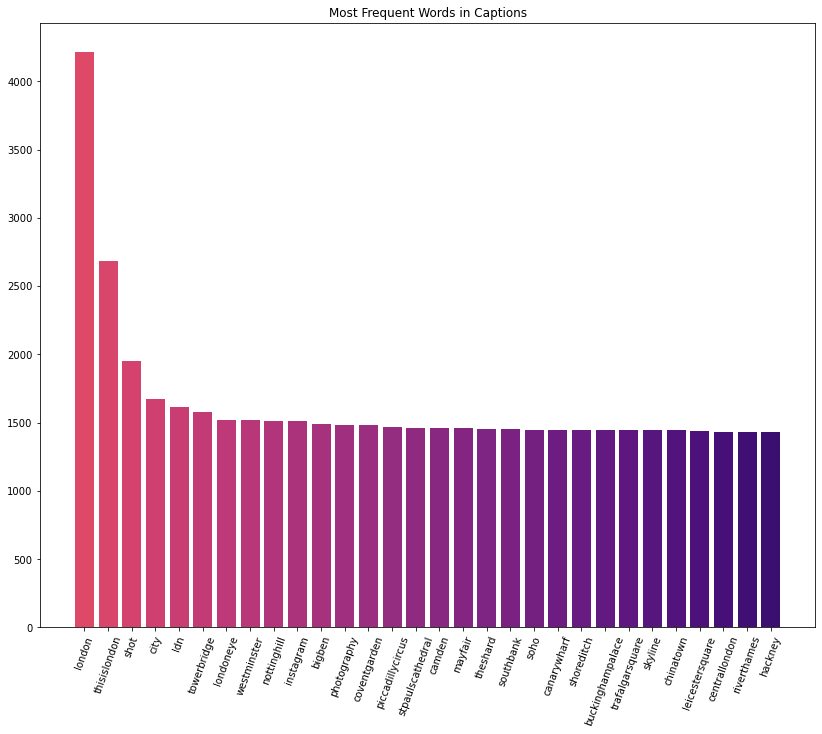

I conducted some text classification in the caption of the posts. This allowed me to generate the best captions for the pictures. We can see the top 30 words used in the captions of the pictures.

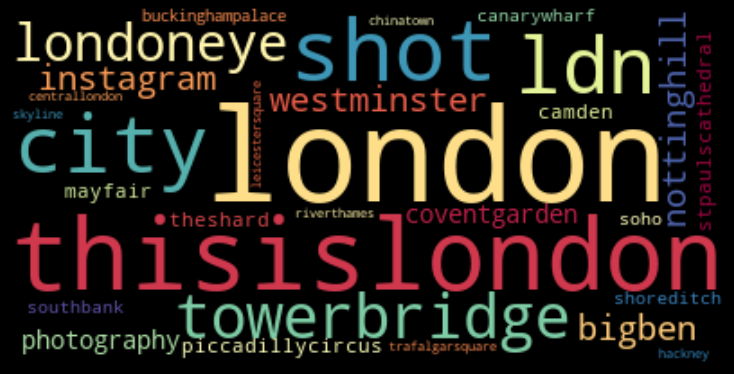

## image classification

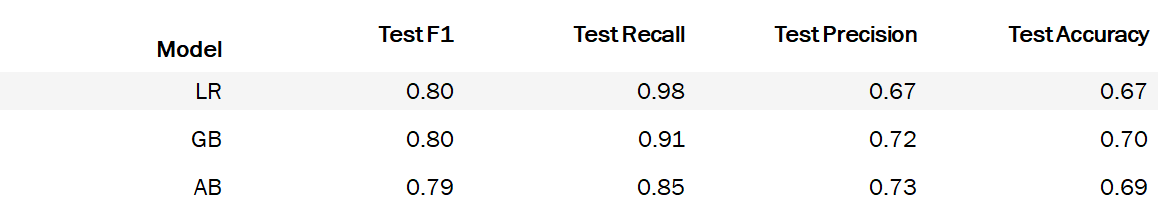

Image classification was done with a totally different dataset, this dataset constituted of images of New York. The machine learning model was trained on this data but it was later used on my main London dataset. I had to manually classify 6.5k following a criteria. The model that performed better was Logistic Regression. We can see that the F1 score and the test Recall are higher than in the other models. Therefore, I decided to create my final model using Logistic Regression.